Preliminary exploratory data analysis:

    - Demonstrate that the dataset can be read from the web into R 
    - Clean and wrangle your data into a tidy format
    - Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    - Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compa
    res the distributions of each of the predictor variables you plan to use in your analysis.

In [8]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [76]:
drug_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", delim = ",", col_names = FALSE)
colnames(drug_data) <- c("id", "age.group", "gender", "education", "country", "ethnicity", "n.score", "e.score", "o.score", "a.score", "c.score", 
              "impulsiveness", "sensation.seeing", "alcohol.use", "amphet.use", "amyl.use", "benzos.use", "caffeine.use", "cannabis.use", 
              "chocolate.use", "cocaine.use", "crack.use", "ecstasy.use", "heroin.use", "ketamine.use", "legal.highs.use", "lsd.use", 
              "methadone.use", "mushroom.use", "nicotine.use", "semeron.use", "vsa.use")
drug_data <- drug_data |>
    mutate(gender = case_when(gender == 0.48246 ~ "Female", gender == -0.48246 ~ "Male")) |>
    mutate(age.group = case_when(age.group == -0.95197 ~ "18-24",
                                age.group == -0.07854 ~ "25-34",
                                age.group == 0.49788 ~ "35-44",
                                age.group == 1.09449 ~ "45-54",
                                age.group == 1.82213 ~ "55-64",
                                age.group == 2.59171 ~ "65+")) |>
    mutate(education = case_when(education == -2.43591 ~ "Left school before age 16",
                                education == -1.73790 ~ "Left school at age 16",
                                education == -1.43719 ~ "Left school at age 17",
                                education == -1.22751 ~ "Left school at age 18",
                                education == -0.61113 ~ "Some post-secondary, no degree",
                                education == -0.05921 ~ "Professional certificate/diploma",
                                education == 0.45468 ~ "University degree",
                                education == 1.16365 ~ "Masters degree",
                                education == 1.98437 ~ "Doctorate degree")) |>
    mutate(country = case_when(country == -0.09765 ~ "Australia",
                              country == 0.24923 ~ "Canada",
                              country == -0.46841 ~ "New Zealand",
                              country == -0.28519 ~ "Other",
                              country == 0.21128 ~ "Republic of Ireland",
                              country == 0.96082 ~ "UK",
                              country == -0.57009 ~ "USA",)) |>
    mutate(ethnicity = case_when(ethnicity == -0.50212 ~ "Asian",
                                ethnicity == -1.10702 ~ "Black",
                                ethnicity == 1.90725 ~ "Mixed-Black/Asian",
                                ethnicity == 0.12600 ~ "Mixed-White/Asian",
                                ethnicity == -0.22166 ~ "Mixed-White/Black",
                                ethnicity == 0.11440 ~ "Other",
                                ethnicity == -0.31685 ~ "White")) |>
    mutate(across(alcohol.use:vsa.use, ~ case_when(. == "CL0" ~ "Never Used",
                                           . == "CL1" ~ "Used over a Decade Ago",
                                           . == "CL2" ~ "Used in Last Decade",
                                           . == "CL3" ~ "Used in Last Year",
                                           . == "CL4" ~ "Used in Last Month",
                                           . == "CL5" ~ "Used in Last Week",
                                           . == "CL6" ~ "Used in Last Day")))
drug_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age.group,gender,education,country,ethnicity,n.score,e.score,o.score,a.score,⋯,ecstasy.use,heroin.use,ketamine.use,legal.highs.use,lsd.use,methadone.use,mushroom.use,nicotine.use,semeron.use,vsa.use
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,⋯,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
3,35-44,Male,Professional certificate/diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,⋯,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,⋯,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used
6,65+,Female,Left school at age 18,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
7,45-54,Male,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
8,35-44,Male,Left school at age 16,UK,White,-1.32828,1.93886,-0.84732,-0.30172,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used
9,35-44,Female,Professional certificate/diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,⋯,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used


n.score,e.score,o.score,a.score,c.score,impulsiveness,sensation.seeing
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.660477e-05,-0.0001628011,-0.0005343979,-0.0002449655,-0.000386069,0.007216064,-0.003291666


`summarise()` has grouped output by 'drug.usage'. You can override using the
`.groups` argument.


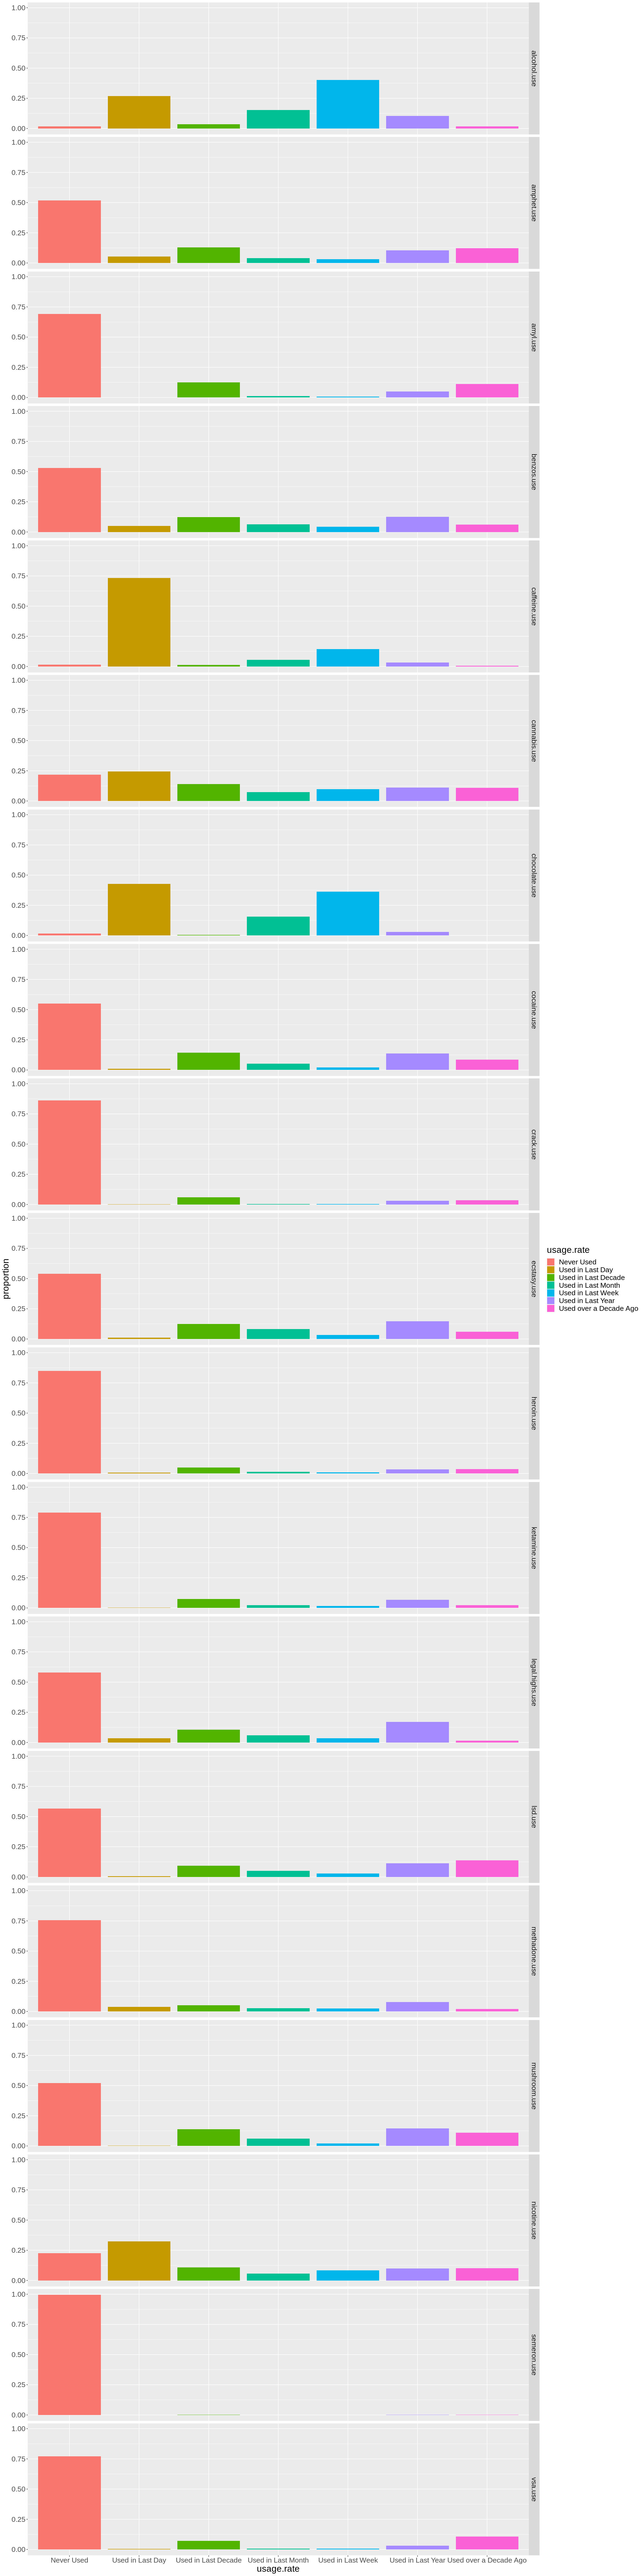

In [77]:
drug_personality_means <- drug_data |>
    summarise(across(n.score:sensation.seeing, mean, na.rm = TRUE))
drug_personality_means

drug_use <- drug_data |>
    select(alcohol.use:vsa.use) |>
    pivot_longer(cols = alcohol.use:vsa.use,
                 names_to = "drug.usage",
                 values_to = "usage.rate") |>
    group_by(drug.usage, usage.rate) |>
    summarize(n = n()) |>
    mutate(proportion = n/1888)
options(repr.plot.width = 20, repr.plot.height = 80)
drug_plot <- drug_use |>
    ggplot(aes(x = usage.rate, y = proportion, fill = usage.rate)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_grid(rows = vars(drug.usage)) +
    theme(text = element_text(size = 20))
drug_plot